# 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [104]:
#Cargar las librerias necesrias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [105]:
# lectura de datos en Python y lo cargamos en la variable dfCorazon

dfCorazon = pd.read_csv('G:/Mi unidad/PUBLIC/UNAD/Semestres/S6/AnalisisDeDatos/T3_Trabajo_COL_17042024/RegresionLogistica/heart_cleveland_upload.csv')

In [106]:
# Realizamos lectura de dfCorazon para el análisis exploratorio

dfCorazon.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


### Descripción de las variables:

- age: edad
- sex: sexo
- cp: tipo de dolor de pecho (angina)
- trestbps: presión arterial en reposo (en mmHg)
- chol: nivel de colesterol en suero (en mg/dl)
- fbs: nivel de azúcar en sangre en ayunas > 120 mg/dl (1 = verdadero; 0 = falso)
- restecg: resultados electrocardiográficos en reposo
- thalach: frecuencia cardíaca máxima alcanzada
- exang: angina inducida por el ejercicio (1 = sí; 0 = no)
- oldpeak: depresión del ST inducida por el ejercicio en comparación con el reposo
- slope: la pendiente del segmento pico del ejercicio ST
- ca: número de vasos principales (0-3) coloreados por la fluoroscopia
- thal: 3 = normal; 6 = defecto fijo; 7 = defecto reversible
- condition: condición (presencia o ausencia de enfer)
dad cardíaca)

### Descripción de los datos:

In [107]:
# Descripción de los datos
dfCorazon.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


# 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

### Identificación de datos faltantes

In [108]:
dfCorazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


### Identificación de datos atipicos

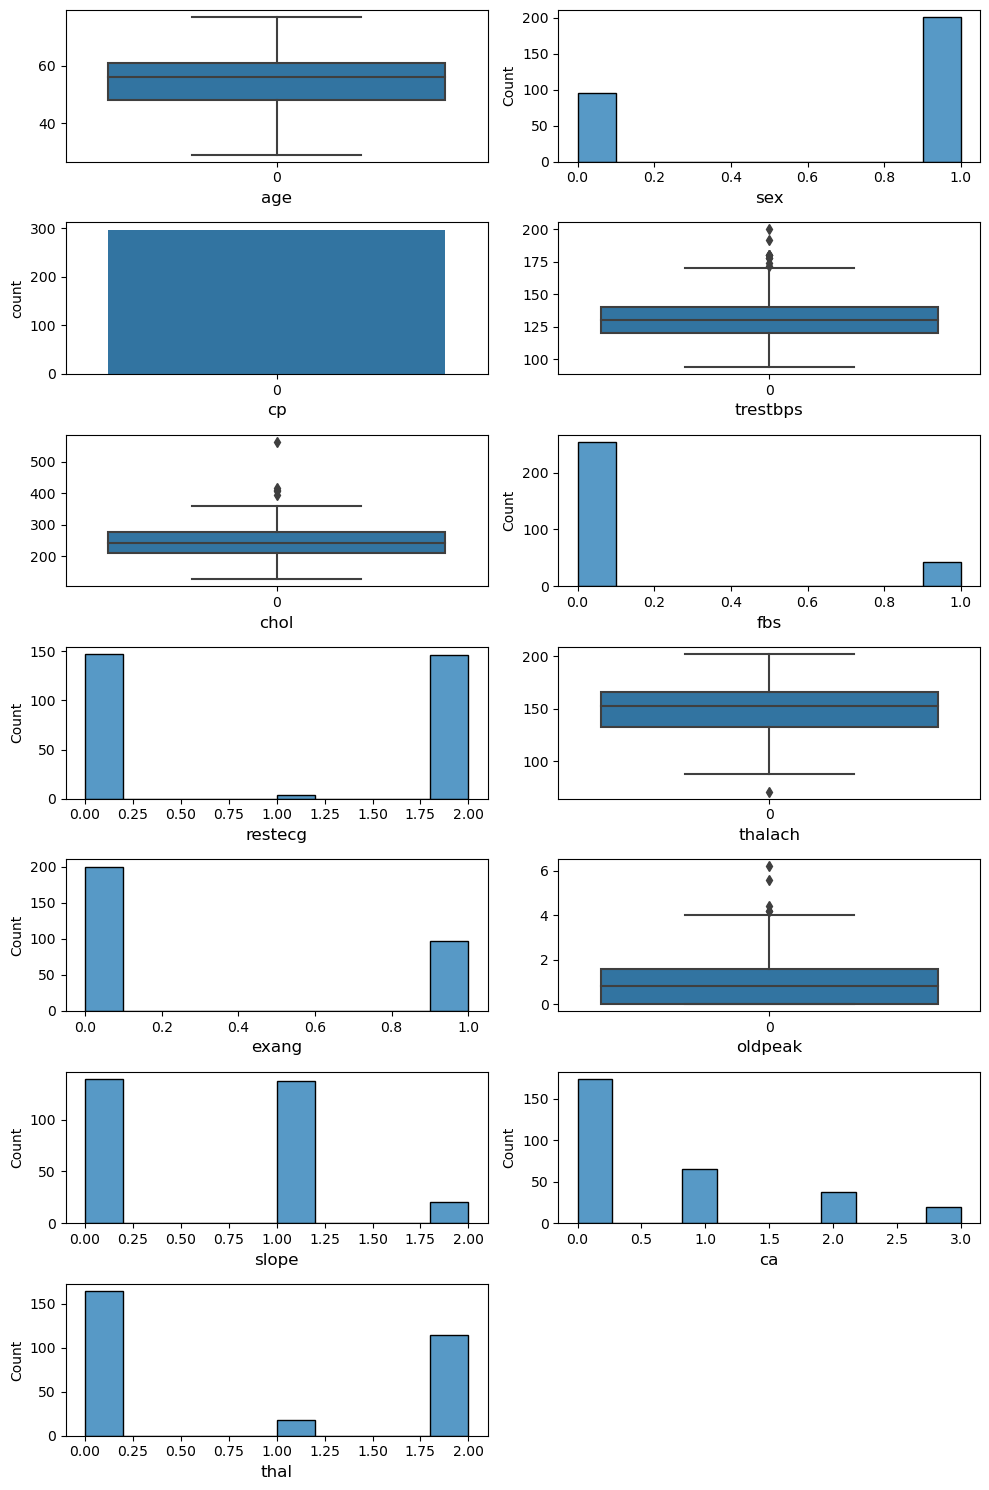

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(7, 2, figsize=(10, 15))

# Crear boxplot para 'age'
sns.boxplot(dfCorazon['age'], ax=axs[0, 0])
axs[0, 0].set_xlabel('age', fontsize=12)

# Crear gráfico de barras para 'sex'
sns.histplot(dfCorazon['sex'], ax=axs[0, 1])
axs[0, 1].set_xlabel('sex', fontsize=12)

# Crear gráfico de barras para 'cp'
sns.countplot(dfCorazon['cp'], ax=axs[1, 0])
axs[1, 0].set_xlabel('cp', fontsize=12)

# Crear boxplot para 'trestbps'
sns.boxplot(dfCorazon['trestbps'], ax=axs[1, 1])
axs[1, 1].set_xlabel('trestbps', fontsize=12)

# Crear boxplot para 'chol'
sns.boxplot(dfCorazon['chol'], ax=axs[2, 0])
axs[2, 0].set_xlabel('chol', fontsize=12)

# Crear gráfico de barras para 'fbs'
sns.histplot(dfCorazon['fbs'], ax=axs[2, 1])
axs[2, 1].set_xlabel('fbs', fontsize=12)

# Crear histograma para 'restecg'
sns.histplot(dfCorazon['restecg'], ax=axs[3, 0])
axs[3, 0].set_xlabel('restecg', fontsize=12)

# Crear boxplot para 'thalach'
sns.boxplot(dfCorazon['thalach'], ax=axs[3, 1])
axs[3, 1].set_xlabel('thalach', fontsize=12)

# Crear gráfico de barras para 'exang'
sns.histplot(dfCorazon['exang'], ax=axs[4, 0])
axs[4, 0].set_xlabel('exang', fontsize=12)

# Crear boxplot para 'oldpeak'
sns.boxplot(dfCorazon['oldpeak'], ax=axs[4, 1])
axs[4, 1].set_xlabel('oldpeak', fontsize=12)

# Crear histograma para 'slope'
sns.histplot(dfCorazon['slope'], ax=axs[5, 0])
axs[5, 0].set_xlabel('slope', fontsize=12)

# Crear histograma para 'ca'
sns.histplot(dfCorazon['ca'], ax=axs[5, 1])
axs[5, 1].set_xlabel('ca', fontsize=12)

# Crear histograma para 'thal'
sns.histplot(dfCorazon['thal'], ax=axs[6, 0])
axs[6, 0].set_xlabel('thal', fontsize=12)

# Eliminar el último eje, ya que no se utiliza
fig.delaxes(axs[6, 1])

plt.tight_layout()
plt.show()


#### Varoles atipicos variable chol

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos variable dfCorazon')

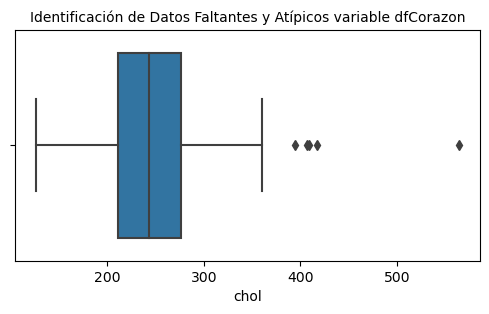

In [110]:
#Identificación de Datos Faltantes y Atípicos dfCorazon - chol

plt.figure(figsize=(6, 3))
sns.boxplot(x=dfCorazon['chol'])
plt.title('Identificación de Datos Faltantes y Atípicos variable dfCorazon', fontsize=10 )

In [111]:
#Conteo de Datos Atípicos - dfCorazon - chol

# nivel_minimo=20
nivel_maximo=450
Total_Atipicos=((dfCorazon['chol']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 1


In [112]:
# Filtra Datos Atípicos

dfCorazon=dfCorazon[(dfCorazon['chol']<nivel_maximo)]

In [113]:
#Conteo de Datos Atípicos - dfCorazon - chol

# nivel_minimo=20
nivel_maximo=450
Total_Atipicos=((dfCorazon['chol']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [114]:
#Revisión del tipo de datos y datos faltantes

dfCorazon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        296 non-null    int64  
 1   sex        296 non-null    int64  
 2   cp         296 non-null    int64  
 3   trestbps   296 non-null    int64  
 4   chol       296 non-null    int64  
 5   fbs        296 non-null    int64  
 6   restecg    296 non-null    int64  
 7   thalach    296 non-null    int64  
 8   exang      296 non-null    int64  
 9   oldpeak    296 non-null    float64
 10  slope      296 non-null    int64  
 11  ca         296 non-null    int64  
 12  thal       296 non-null    int64  
 13  condition  296 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 34.7 KB


# 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

### Caracteristica de interes:

- condition: condición (presencia o ausencia de enfermedad cardíaca)
- predecir si una persona puede tener una enfermedad cardíacates

In [115]:
# Total de personas con una efermedad cardiaca

dfCorazon['condition'].value_counts()

condition
0    159
1    137
Name: count, dtype: int64

In [116]:
dfCorazon[['condition']].head(15)

,condition
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,1
8,0
9,0


# 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [117]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%
# Se crean variables X y Y para almacenar la información del entrenamiento

X = dfCorazon.drop('condition',axis=1) # Se cargan los datos de train sin los datos de la columna condition
Y = dfCorazon['condition'] # Se cargan los datos de train con los datos de la la columna condition

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [118]:
print (X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
232   57    0   3       128   303    0        2      159      0      0.0   
53    48    1   1       130   245    0        2      180      0      0.2   
102   58    1   2       140   211    1        2      165      0      0.0   
187   62    1   3       120   267    0        0       99      1      1.8   
169   66    1   3       160   228    0        2      138      0      2.3   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
73    71    0   2       110   265    1        2      130      0      0.0   
167   66    0   3       178   228    1        0      165      1      1.0   
154   37    0   2       120   215    0        0      170      0      0.0   
153   37    1   2       130   250    0        0      187      0      3.5   
259   51    0   3       130   305    0        0      142      1      1.2   

     slope  ca  thal  
232      0   1     0  
53       1   0     0  
102      0   0    

In [119]:
print (Y_train)

232    0
53     0
102    0
187    1
169    0
      ..
73     0
167    1
154    0
153    0
259    1
Name: condition, Length: 222, dtype: int64


# 5. Entrenar el modelo configurando los diferentes hiperparámetros

In [120]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [121]:
print (Y_test)

112    0
250    1
240    1
211    1
285    0
      ..
172    0
136    1
138    0
201    1
258    1
Name: condition, Length: 74, dtype: int64


In [122]:
print (Prediccion)

[0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 0
 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1]


# 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [123]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.88      0.85      0.87        34

    accuracy                           0.88        74
   macro avg       0.88      0.88      0.88        74
weighted avg       0.88      0.88      0.88        74



# 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

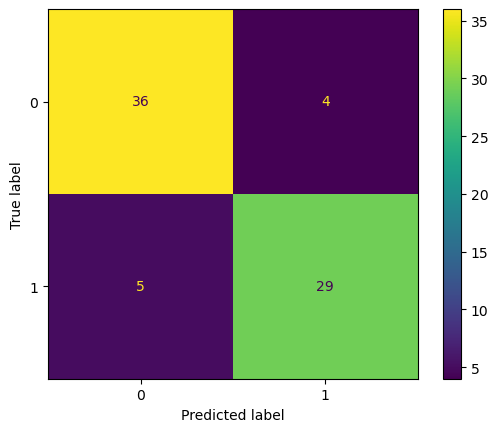

In [124]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

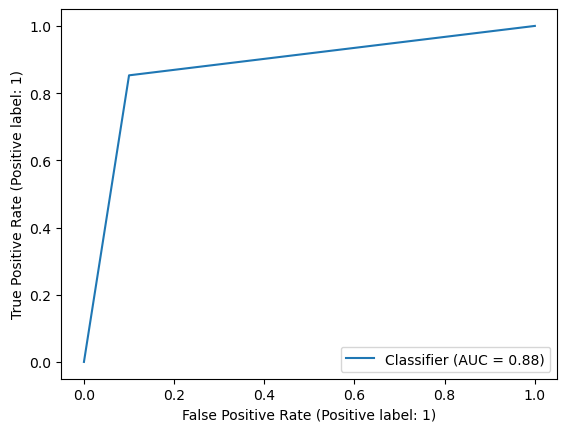

In [125]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

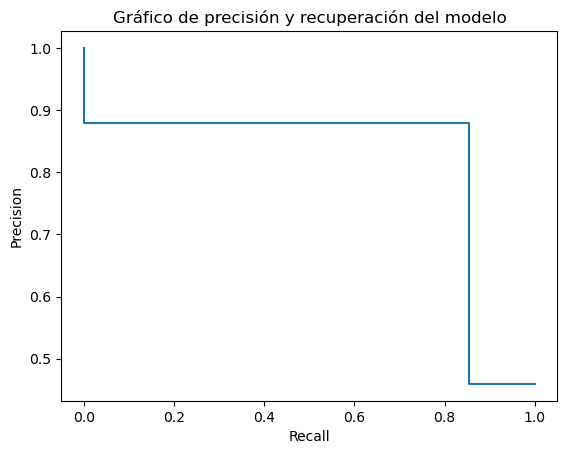

In [126]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

precision, recall, _ = precision_recall_curve(Y_test, Prediccion)
pr_display = PrecisionRecallDisplay(precision=precision, recall=recall)
pr_display.plot()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Gráfico de precisión y recuperación del modelo')
plt.show()

# 8. Interpretar, analizar y documentar los resultados obtenidos

#
Del desempeño del modelo se puede describir:  
*(Para la interpretación del análisis se debe tener en cuenta que la clase 0 significa que no tiene una enfermedad cardiaca y la clase 1 significa que sí tiene una enfermedad cardiaca.)*

**Precisión (Precision):** La precisión es del 88% para ambas clases, lo que indica que el modelo clasifica correctamente aproximadamente el 88% de las muestras positivas.  
**Recall (Exhaustividad o Sensibilidad):** El valor de recall para la clase 0 es del 90%, lo que significa que el modelo identifica correctamente el 90% de las muestras que son realmente de la clase 0, mientras que el recall para la clase 1 es del 85%, lo que indica que el modelo identifica correctamente el 85% de las muestras que son realmente de la clase 1.  
**F1-score:** En este caso, el F1-score para la clase 0 es del 89% y para la clase 1 es del 87%.  
**Accuracy (Exactitud):** Para este modelo desarrollado, la exactitud es del 88%, lo que indica que el modelo clasifica correctamente el 88% de todas las muestras.  
**Macro avg y Weighted avg:** Estas métricas son la media de las métricas respectivas calculadas para cada clase, con y sin considerar el desequilibrio de clase en los datos, respectivamente. Ambas tienen un valor del 88%, lo que indica un rendimiento equilibrado del modelo en ambas clases.

**Matriz de Confusión:**  
La matriz de confusión muestra la cantidad de predicciones correctas e incorrectas realizadas por el modelo de regresión logística. En este caso:  
Verdaderos positivos (TP): 29  
Verdaderos negativos (TN): 36  
Falsos positivos (FP): 4  
Falsos negativos (FN): 5  
Esto nos permite evaluar el rendimiento del modelo en términos de precisión y exhaustividad.

**Curva de Precisión del Modelo:**  
El área bajo la curva (AUC) es 0.88, lo que indica que el modelo tiene un buen rendimiento en términos de discriminación entre las clases positiva y negativa.

**Gráfico de Precisión y Recuperación del Modelo:**  
El gráfico de precisión y recuperación muestra la relación entre la precisión y la recuperación del modelo en diferentes umbrales de clasificación.  
La precisión es la proporción de verdaderos positivos sobre todos los casos clasificados como positivos, mientras que la recuperación (o sensibilidad) es la proporción de verdaderos positivos sobre todos los casos positivos reales.  
En este caso, el gráfico muestra una precisión de alrededor del 90% con una recuperación de alrededor del 85%.

Se puede concluir, que, el modelo de regresión logística tiene un buen rendimiento en términos de discriminar entre las clases positiva y negativa, como se indica por el alto valor del área bajo la curva ROC y la precisión y recuperación relativamente altas.


# 9. Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/